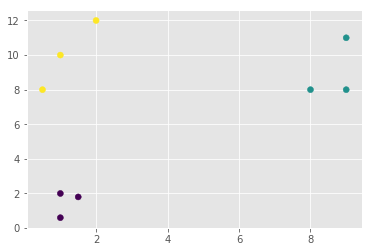

Prediction using svm for new data [10.58, 10.76] : 1
Prediction using svm for new data [1, 10.8] : 2
Prediction using svm for new data [0.1, 2] : 0


In [3]:
"""
multi classification을 이진분류기인 SVM으로 해결
--> one vs. rest 방식으로 구현
--> class가 M개인 경우 : 각각의 클래스에 속하는 점/ 속하지 않는 점을 분류하는
    svm 분류기를 총 M개 만들기
--> M개의 분류기에서 voting 해서 가장 많은 score 가진 label로 결정.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn import svm

# 데이터 세팅
data = np.array([[1, 2],
             [9, 8],
             [1, 10],
             [1.5, 1.8],
             [8, 8],
             [0.5, 8],
             [1, 0.6],
             [9, 11],
             [2, 12]])
# xy 분리
x = data[:, 0]
y = data[:, 1]

# label 세팅
label = [0, 1, 2, 0, 1, 2, 0, 1, 2]

color = [str(item/255.) for item in label]

plt.scatter(x, y, c=color)
plt.show()


# 총 3개의 binary class label 생성
bn_label_lists = []
for i in range(3):
    bn_label_lists.append([])

for idx in range(len(label)):
    lb = label[idx]
    for i in range(3):
        if i == lb:
            bn_label_lists[i].append(1)
        else:
            bn_label_lists[i].append(-1)

# 3개의 svm classifier 생성
# i번째 svm model은 i번째 label으로 fit
svms = []
for i in range(3):
    svms.append(svm.SVC(kernel='linear', C= 1.0))
    svms[i].fit(data, bn_label_lists[i])

# 새로운 데이터로 prediction 과정
new = [[[10.58, 10.76]], [[1, 10.8]], [[0.1, 2]]]
vote = [[0, 0, 0], [0, 0, 0], [0, 0, 0]]

for data_idx in range(len(new)):
    for svm_idx in range(len(svms)):
        vote[data_idx][svm_idx] += svms[svm_idx].predict(new[data_idx])[0] #prediction
    vote[data_idx] = np.argsort(vote[data_idx])
    print("Prediction using svm for new data", new[data_idx][0], ":", vote[data_idx][len(svms)-1])


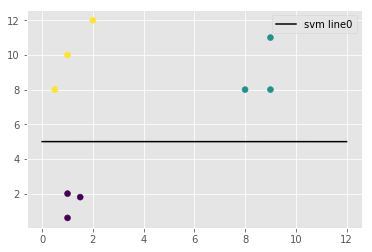

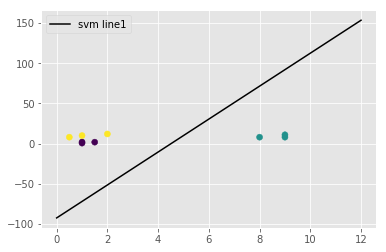

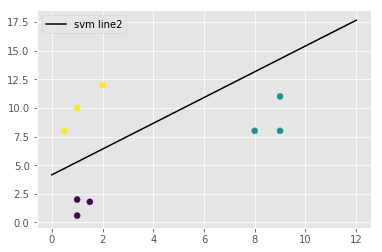

In [2]:
#데이터와 svm classifier line을 함께 그래프에 나타내기
idx=0 
for m in svms: 
    w = m.coef_[0]
    svm_a = -w[0] / w[1]
    svm_b = -m.intercept_[0] / w[1]

    svm_x = np.linspace(0, 12)

    svm_y = svm_a * svm_x + svm_b

    grp = plt.plot(svm_x, svm_y, 'k-', label='svm line'+str(idx))
    idx += 1

    color = [str(item/255.) for item in label]

    plt.scatter(x, y, c=color)
    plt.legend()
    plt.show()